In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error 

In [2]:
df = pd.read_csv('train_F3fUq2S.csv')
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [3]:
df_test = pd.read_csv('test_Bk2wfZ3.csv')
df_test.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,mean_CTA_len,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience
0,1889,3,61,12871,11,6,1,Noon,6,26,...,37,1,0,0,0,1,0,0,0,14
1,1890,3,54,2569,256,5,1,Morning,2,11,...,22,0,0,0,0,0,0,0,0,10
2,1891,3,88,1473,78,4,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
3,1892,3,88,1473,78,3,0,Evening,2,11,...,22,1,0,1,0,0,0,0,0,10
4,1893,3,78,9020,29,3,0,Noon,6,26,...,40,0,0,0,0,0,0,0,0,14


In [4]:
df.shape

(1888, 22)

In [5]:
df['campaign_id'].nunique()

1888

In [6]:
df['sender'].unique()

array([ 3, 10,  0,  2, 14, 12, 15,  7, 11,  9,  1,  6])

In [7]:
df['day_of_week'].unique()

array([5, 4, 3, 2, 1, 0, 6])

In [8]:
# checking the null values in the dataset
df.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
click_rate            0
dtype: int64

### Conclusion : <i> There are no nulls in the dataset</i>

In [9]:
df_test.isnull().sum()

campaign_id           0
sender                0
subject_len           0
body_len              0
mean_paragraph_len    0
day_of_week           0
is_weekend            0
times_of_day          0
category              0
product               0
no_of_CTA             0
mean_CTA_len          0
is_image              0
is_personalised       0
is_quote              0
is_timer              0
is_emoticons          0
is_discount           0
is_price              0
is_urgency            0
target_audience       0
dtype: int64

In [10]:
# checking for the outliers in the continuous features 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [12]:
# list of continuous features
cont_feat = ['subject_len','body_len','mean_paragraph_len','no_of_CTA','mean_CTA_len']

In [13]:
df['is_emoticons'].unique()

array([0, 2, 1, 3, 4, 6])

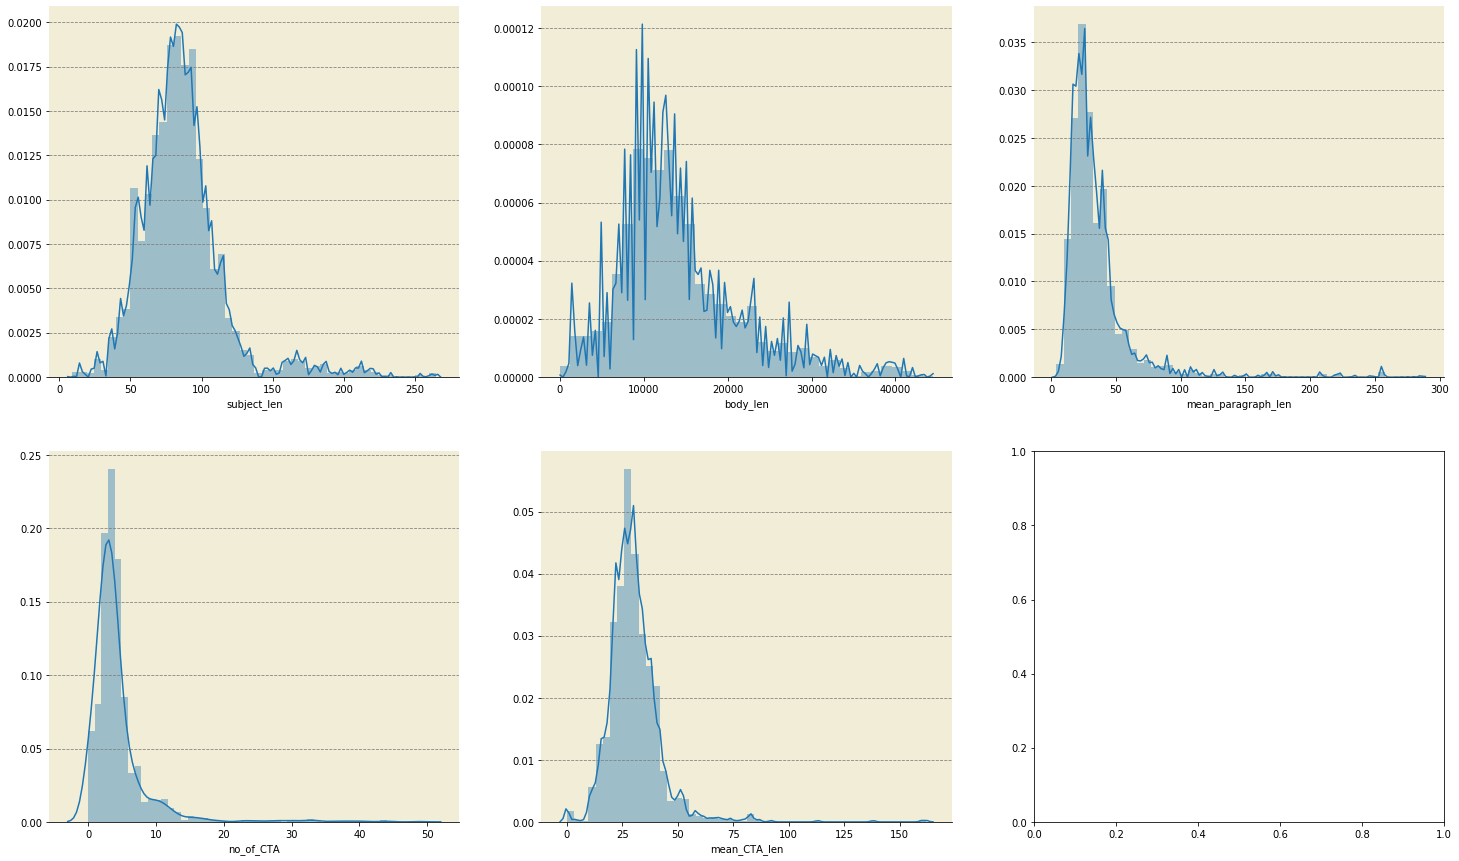

In [14]:
cols=3
rows=2
fig,ax = plt.subplots(nrows=rows,ncols=cols,figsize=(25,15))
col_index = -1
for i in range(0,rows):
    for j in range(0,cols):
        
        if((i==1) & (j==2)):
            break
        
        ax[i][j].set_facecolor('#F2EDD7FF')
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['left'].set_visible(False)
        ax[i][j].grid(linestyle="--",axis='y',color='gray')
        col_index = col_index + 1
        
        sns.distplot(df[cont_feat[col_index]],ax=ax[i][j],kde_kws = {'bw' : 1})

In [15]:
# we can clearly see that there are outliers in ['subject_len','body_len','mean_paragraph_len','no_of_CTA','mean_CTA_len']

### Capping the Outliers

In [16]:
print(df['subject_len'].min())
print(df['subject_len'].max())

9
265


In [17]:
np.percentile(df['subject_len'],5),np.percentile(df['subject_len'],95)

(47.0, 134.0)

In [18]:
np.percentile(df['body_len'],5), np.percentile(df['body_len'],95)

(4750.6, 28948.999999999993)

In [19]:
np.percentile(df['mean_paragraph_len'],5), np.percentile(df['mean_paragraph_len'],95)

(14.0, 77.0)

In [20]:
a = df[df['mean_paragraph_len']>=77]['mean_paragraph_len'].value_counts().reset_index()
a= a.sort_values(by=['index'])
a['cumsum'] = a.mean_paragraph_len.cumsum()
a

,index,mean_paragraph_len,cumsum
14,77,2,2
1,78,4,6
6,79,3,9
2,81,4,13
3,83,4,17
16,84,2,19
43,85,1,20
49,86,1,21
44,87,1,22
8,88,3,25


In [21]:
np.percentile(df['no_of_CTA'],5), np.percentile(df['no_of_CTA'],95)

(0.0, 11.0)

In [22]:
df['no_of_CTA'].value_counts()

3     445
2     364
4     331
5     157
1     148
0     115
7      71
6      62
11     29
9      29
10     28
8      25
12     17
13     12
15      8
17      5
16      5
33      4
30      3
28      3
23      3
14      3
19      2
18      2
44      2
34      1
41      1
40      1
39      1
38      1
37      1
36      1
32      1
31      1
27      1
26      1
25      1
24      1
20      1
49      1
Name: no_of_CTA, dtype: int64

In [23]:
np.percentile(df['mean_CTA_len'],5), np.percentile(df['mean_CTA_len'],95)

(15.0, 48.0)

In [24]:
b= df['mean_CTA_len'].value_counts().reset_index()
b = b.sort_values(by=['index'])
b.head(10)

,index,mean_CTA_len
34,0,10
62,1,1
54,4,2
59,7,1
31,10,14
65,11,1
28,12,19
40,13,8
39,14,8
22,15,34


In [25]:
def cap_outliers(a):
    if(a>percentile_95):
        return percentile_95
    elif(a<percentil_5):
        return percentil_5
    else :
        return a

In [26]:
# repacing the values below 5 percentile with 5th percentile and values above 10 percentile with 10th percentile in both train(df) and test_df
for i in cont_feat:
    percentil_5 = np.percentile(df[i], 5)
    percentile_95 = np.percentile(df[i], 95)
    df[i] = df[i].apply(cap_outliers)
    df_test[i] = df_test[i].apply(cap_outliers)

### Dealing with Categorical Variables

In [27]:
df['is_image'].value_counts()

0    716
1    685
2    442
3     39
6      4
4      2
Name: is_image, dtype: int64

In [28]:
df['is_quote'].value_counts()

0    885
1    638
2    227
3     93
4     27
5     12
6      6
Name: is_quote, dtype: int64

In [29]:
df['is_emoticons'].value_counts()

0    1626
1     172
2      54
3      30
4       4
6       2
Name: is_emoticons, dtype: int64

In [30]:
np.percentile(df['is_image'],5), np.percentile(df['is_image'],95)

(0.0, 2.0)

In [31]:
np.percentile(df['is_quote'],5), np.percentile(df['is_quote'],95)

(0.0, 3.0)

In [32]:
np.percentile(df['is_emoticons'],5), np.percentile(df['is_emoticons'],95)

(0.0, 1.0)

In [33]:
# replacing the categories which fall above 95th percentile with a new category

In [34]:
df.loc[df['is_image']>2,'is_image'] = 3
df.loc[df['is_quote']>3,'is_quote'] = 4
df.loc[df['is_emoticons']>1,'is_emoticons'] = 2

In [35]:
# doing the same in the test_df
df_test.loc[df_test['is_image']>2,'is_image'] = 3
df_test.loc[df_test['is_quote']>3,'is_quote'] = 4
df_test.loc[df_test['is_emoticons']>1,'is_emoticons'] = 2

In [36]:
df['sender'].value_counts()

3     1559
10     181
15      89
6       22
9       13
14       7
11       7
12       3
0        3
7        2
2        1
1        1
Name: sender, dtype: int64

In [37]:
temp = df['sender'].value_counts().reset_index()

temp['ratio'] = temp['sender']/df.shape[0]
temp['cum_sum'] = temp['ratio'].cumsum()
temp

,index,sender,ratio,cum_sum
0,3,1559,0.825742,0.825742
1,10,181,0.095869,0.921610
2,15,89,0.047140,0.968750
3,6,22,0.011653,0.980403
4,9,13,0.006886,0.987288
5,14,7,0.003708,0.990996
6,11,7,0.003708,0.994703
7,12,3,0.001589,0.996292
8,0,3,0.001589,0.997881
9,7,2,0.001059,0.998941


In [38]:
df.loc[df['sender'].isin(list(temp[temp['cum_sum']>0.98]['index'].values)),'sender'] = 1000

# doing the same for test_df
df_test.loc[df_test['sender'].isin(list(temp[temp['cum_sum']>0.98]['index'].values)),'sender'] = 1000


df['sender'].value_counts()

3       1559
10       181
15        89
1000      59
Name: sender, dtype: int64

In [39]:
df['product'].value_counts()

9     339
5     200
34    178
11    166
42    137
23    126
1     108
13     79
6      79
31     77
26     70
12     48
14     37
24     33
29     23
10     21
17     19
18     17
20     15
28     13
22     12
21     11
38      9
3       8
36      7
37      7
43      6
16      6
25      6
32      6
27      4
8       4
19      3
40      3
33      2
41      2
15      1
7       1
35      1
39      1
4       1
2       1
0       1
Name: product, dtype: int64

In [40]:
temp_1 = df['product'].value_counts().reset_index()

temp_1['ratio'] = temp_1['product']/df.shape[0]
temp_1['cum_sum'] = temp_1['ratio'].cumsum()
temp_1

,index,product,ratio,cum_sum
0,9,339,0.179555,0.179555
1,5,200,0.105932,0.285487
2,34,178,0.094280,0.379767
3,11,166,0.087924,0.467691
4,42,137,0.072564,0.540254
5,23,126,0.066737,0.606992
6,1,108,0.057203,0.664195
7,13,79,0.041843,0.706038
8,6,79,0.041843,0.747881
9,31,77,0.040784,0.788665


In [41]:
df.loc[df['product'].isin(list(temp_1[temp_1['cum_sum']>0.90]['index'].values)),'product'] = 1000


# doing the same in the test_df
df_test.loc[df_test['product'].isin(list(temp_1[temp_1['cum_sum']>0.90]['index'].values)),'product'] = 1000

df['product'].value_counts()

9       339
1000    211
5       200
34      178
11      166
42      137
23      126
1       108
13       79
6        79
31       77
26       70
12       48
14       37
24       33
Name: product, dtype: int64

In [42]:
df['category'].value_counts()

15    837
6     229
1     200
9     179
2     166
10    137
11     61
12     24
5      19
13     11
8       6
4       6
3       6
7       4
14      2
0       1
Name: category, dtype: int64

In [43]:
temp_2 = df['category'].value_counts().reset_index()

temp_2['ratio'] = temp_2['category']/df.shape[0]
temp_2['cum_sum'] = temp_2['ratio'].cumsum()
temp_2

,index,category,ratio,cum_sum
0,15,837,0.443326,0.443326
1,6,229,0.121292,0.564619
2,1,200,0.105932,0.670551
3,9,179,0.094809,0.765360
4,2,166,0.087924,0.853284
5,10,137,0.072564,0.925847
6,11,61,0.032309,0.958157
7,12,24,0.012712,0.970869
8,5,19,0.010064,0.980932
9,13,11,0.005826,0.986758


In [44]:
df.loc[df['category'].isin(list(temp_2[temp_2['cum_sum']>0.96]['index'].values)),'category'] = 1000

#doing the same in the test_df
df_test.loc[df_test['category'].isin(list(temp_2[temp_2['cum_sum']>0.96]['index'].values)),'category'] = 1000

df['category'].value_counts()

15      837
6       229
1       200
9       179
2       166
10      137
1000     79
11       61
Name: category, dtype: int64

In [45]:
df['target_audience'].value_counts()

12    1169
14     175
10     136
16     132
15      61
7       56
1       50
2       20
5       16
6       14
11      12
13      10
4       10
8        9
3        9
9        6
0        3
Name: target_audience, dtype: int64

In [46]:
temp_3 = df['target_audience'].value_counts().reset_index()

temp_3['ratio'] = temp_3['target_audience']/df.shape[0]
temp_3['cum_sum'] = temp_3['ratio'].cumsum()
temp_3

,index,target_audience,ratio,cum_sum
0,12,1169,0.619174,0.619174
1,14,175,0.092691,0.711864
2,10,136,0.072034,0.783898
3,16,132,0.069915,0.853814
4,15,61,0.032309,0.886123
5,7,56,0.029661,0.915784
6,1,50,0.026483,0.942267
7,2,20,0.010593,0.952860
8,5,16,0.008475,0.961335
9,6,14,0.007415,0.968750


In [47]:
df.loc[df['target_audience'].isin(list(temp_3[temp_3['cum_sum']>0.95]['index'].values)),'target_audience'] = 1000

#doing the smae in test_df
df_test.loc[df_test['target_audience'].isin(list(temp_3[temp_3['cum_sum']>0.95]['index'].values)),'target_audience'] = 1000

df['target_audience'].value_counts()

12      1169
14       175
10       136
16       132
1000     109
15        61
7         56
1         50
Name: target_audience, dtype: int64

In [48]:
# checking the remaining categorical columns
df['is_weekend'].value_counts()

0    1511
1     377
Name: is_weekend, dtype: int64

In [49]:
df['times_of_day'].value_counts()

Evening    1317
Noon        447
Morning     124
Name: times_of_day, dtype: int64

In [50]:
df['is_personalised'].value_counts()

0    1781
1     107
Name: is_personalised, dtype: int64

In [51]:
df['is_timer'].value_counts()                    # remove this column as it doesn't add any info in the modeling

0    1888
Name: is_timer, dtype: int64

In [52]:
df['is_discount'].value_counts()                

0    1813
1      75
Name: is_discount, dtype: int64

In [53]:
df['is_price'].value_counts()                

0        1875
5499        5
8000        2
5000        2
1399        1
1000        1
4999        1
14999       1
Name: is_price, dtype: int64

In [54]:
df.loc[df['is_price']>0,'is_price'] = 1              # converting the 'is_price' feature to a boolean format

#doing the same in the df_test
df_test.loc[df_test['is_price']>0,'is_price'] = 1

df['is_price'].value_counts()                

0    1875
1      13
Name: is_price, dtype: int64

In [55]:
df['is_urgency'].value_counts()                

0    1676
1     212
Name: is_urgency, dtype: int64

In [56]:
# Changing the data type of the categorical columns from int to flaot
cat_cols = ['sender','day_of_week','category','product','is_image','is_quote','is_emoticons','target_audience']

In [57]:
for i in cat_cols:
    df[i] = df[i].astype(str)

In [58]:
for i in cat_cols:
    df_test[i] = df_test[i].astype(str)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   object 
 2   subject_len         1888 non-null   float64
 3   body_len            1888 non-null   float64
 4   mean_paragraph_len  1888 non-null   float64
 5   day_of_week         1888 non-null   object 
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   object 
 9   product             1888 non-null   object 
 10  no_of_CTA           1888 non-null   float64
 11  mean_CTA_len        1888 non-null   float64
 12  is_image            1888 non-null   object 
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   object 
 15  is_timer            1888 non-null   int64  
 16  is_emo

In [60]:
# Implementing ANOVA on categorical variables
# Implementing corr,vif to avoid multicollinearity
# Implmenting Linear Regression
# Implmenting Random Forest
# Implemneting XGBoost

              df     sum_sq   mean_sq          F        PR(>F)
product     14.0   0.936162  0.066869  10.060472  3.969067e-22
Residual  1873.0  12.449228  0.006647        NaN           NaN


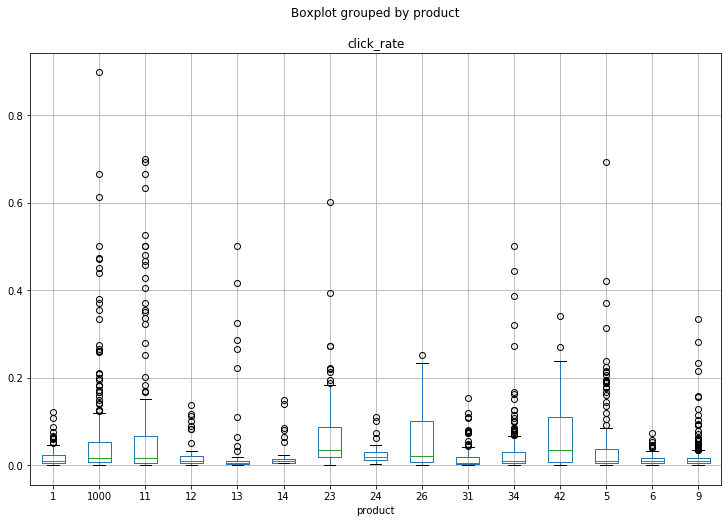

In [61]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


#Create a boxplot
df.boxplot('click_rate', by='product', figsize=(12, 8))

mod = ols('click_rate ~ product',data=df).fit()
aov_table = sm.stats.anova_lm(mod,type=2)
print(aov_table)

#ctrl = data['weight'][data.group == 'ctrl']

# grps = list(df['product'].unique())
# d_data = {grp:df['click_rate'][df['product'] == grp] for grp in grps}

              df    sum_sq   mean_sq          F        PR(>F)
category     7.0   0.79366  0.113380  16.928138  8.151626e-22
Residual  1880.0  12.59173  0.006698        NaN           NaN


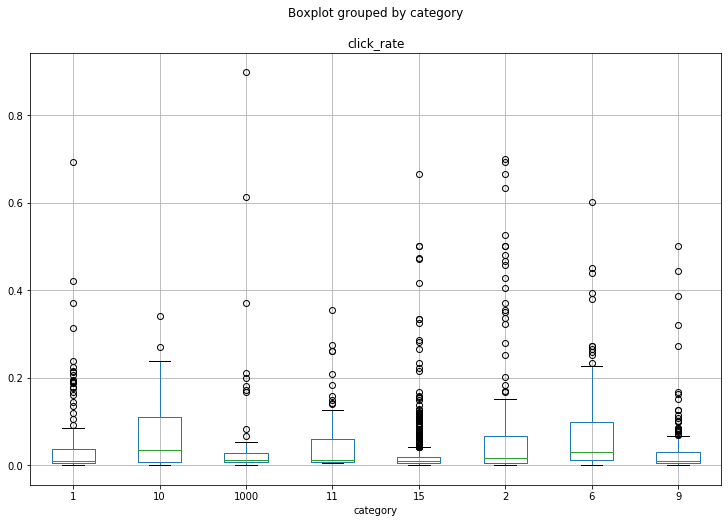

In [62]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


#Create a boxplot
df.boxplot('click_rate', by='category', figsize=(12, 8))

mod = ols('click_rate ~ category',data=df).fit()
aov_table = sm.stats.anova_lm(mod,type=2)
print(aov_table)

#ctrl = data['weight'][data.group == 'ctrl']

# grps = list(df['product'].unique())
# d_data = {grp:df['click_rate'][df['product'] == grp] for grp in grps}

In [63]:
# drop the campaign_id column
df_1 = df.drop(columns=['campaign_id'],axis =1)

test_campaign_id = df_test['campaign_id'].values
df_test = df_test.drop(columns=['campaign_id'],axis =1)

In [64]:
df_1.drop(columns = ['sender','product','category'],axis =1, inplace=True)

df_test.drop(columns = ['sender','product','category'],axis =1, inplace=True)

In [65]:
# dummify the categorical variables

In [66]:
dummify_cols = ['day_of_week','times_of_day','is_image','is_quote','is_emoticons','target_audience']

In [67]:
df_2 = pd.get_dummies(df_1,columns = dummify_cols, drop_first=True)

In [68]:
df_2.head()

,subject_len,body_len,mean_paragraph_len,is_weekend,no_of_CTA,mean_CTA_len,is_personalised,is_timer,is_discount,is_price,...,is_quote_4,is_emoticons_1,is_emoticons_2,target_audience_10,target_audience_1000,target_audience_12,target_audience_14,target_audience_15,target_audience_16,target_audience_7
0,76.0,10439.0,39.0,1,3.0,29.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,54.0,4750.6,77.0,1,0.0,22.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,59.0,12801.0,16.0,1,3.0,23.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,74.0,11037.0,30.0,0,4.0,24.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,80.0,10011.0,27.0,1,3.0,31.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [69]:
df_test = pd.get_dummies(df_test,columns = dummify_cols, drop_first=True)
df_test.head()

,subject_len,body_len,mean_paragraph_len,is_weekend,no_of_CTA,mean_CTA_len,is_personalised,is_timer,is_discount,is_price,...,is_quote_4,is_emoticons_1,is_emoticons_2,target_audience_10,target_audience_1000,target_audience_12,target_audience_14,target_audience_15,target_audience_16,target_audience_7
0,61.0,12871.0,14.0,1,3.0,37.0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
1,54.0,4750.6,77.0,1,0.0,22.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,88.0,4750.6,77.0,0,0.0,22.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,88.0,4750.6,77.0,0,0.0,22.0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,78.0,9020.0,29.0,0,2.0,40.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


### Feature Engineering

In [70]:
df_2['ratio_CTA_chars_to_body_chars'] = (df_2['no_of_CTA']*df_2['mean_CTA_len'])/df_2['body_len']

df_2['no_of_paragraph'] = df_2['body_len']/df_2['mean_paragraph_len']

In [71]:
df_test['ratio_CTA_chars_to_body_chars'] = (df_test['no_of_CTA']*df_test['mean_CTA_len'])/df_test['body_len']

df_test['no_of_paragraph'] = df_test['body_len']/df_test['mean_paragraph_len']

In [1045]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor

# x = df_2.drop(columns = ['click_rate'], axis=1)

# vif_data = pd.DataFrame()
# vif_data["feature"] = x.columns

# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(x.values, i)
#                           for i in range(len(x.columns))]

/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [1046]:
# vif_data

,feature,VIF
0,subject_len,1.594665
1,body_len,10.245472
2,mean_paragraph_len,2.647598
3,is_weekend,inf
4,no_of_CTA,6.493103
...,...,...
56,target_audience_15,2.383647
57,target_audience_16,3.796703
58,target_audience_7,2.311388
59,ratio_CTA_chars_to_body_chars,5.163187


In [1047]:
# vif_data[vif_data['VIF']>10]

,feature,VIF
1,body_len,10.245472
3,is_weekend,inf
18,day_of_week_5,inf
19,day_of_week_6,inf
23,product_11,inf
31,product_34,169.206845
32,product_42,inf
33,product_5,13.613447
36,category_10,inf
39,category_15,65.837554


In [1048]:
# rem_col_ls =[]


# while (vif_data[vif_data['VIF']==np.inf].shape[0]>=1):
#     rem_col = vif_data[vif_data['VIF']==np.inf]['feature'].iloc[0]
    
#     rem_col_ls.append(rem_col)
    
#     x = x.drop(columns = [rem_col], axis=1)

#     vif_data = pd.DataFrame()
#     vif_data["feature"] = x.columns

#     # calculating VIF for each feature
#     vif_data["VIF"] = [variance_inflation_factor(x.values, i)
#                               for i in range(len(x.columns))]

/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [1049]:
# vif_data[vif_data['VIF']>10]

,feature,VIF
1,body_len,10.245472
29,product_34,169.206845
30,product_5,13.613447
33,category_10,10.363629
36,category_15,65.837554
37,category_2,11.815628
38,category_6,28.257515
39,category_9,197.788423
51,target_audience_12,10.873077


In [1050]:
# while(vif_data['VIF'].max()>=10):
#     rem_col = vif_data[vif_data['VIF']==vif_data['VIF'].max()]['feature'].values[0]
    
#     rem_col_ls.append(rem_col)
    
#     x = x.drop(columns = [rem_col], axis=1)

#     vif_data = pd.DataFrame()
#     vif_data["feature"] = x.columns

#     # calculating VIF for each feature
#     vif_data["VIF"] = [variance_inflation_factor(x.values, i)
#                               for i in range(len(x.columns))]

/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1687: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


In [1051]:
# vif_data

,feature,VIF
0,mean_paragraph_len,8.241577
1,is_personalised,1.370841
2,is_timer,NaN
3,is_discount,1.245898
4,is_price,1.057516
5,is_urgency,1.310170
6,sender_1000,1.259847
7,sender_15,1.273638
8,day_of_week_1,2.186272
9,day_of_week_2,2.392749


In [1052]:
# rem_col_ls

['is_weekend',
 'product_11',
 'product_42',
 'category_9',
 'category_15',
 'body_len',
 'mean_CTA_len',
 'subject_len',
 'target_audience_12',
 'category_6',
 'no_of_CTA',
 'sender_3']

### Data Preparation & Modelling

In [1053]:
# # remove hightly collinear features from the dataset
# df_3 = df_2.drop(columns = rem_col_ls, axis=1)

In [1054]:
# df_test = df_test.drop(columns = rem_col_ls, axis=1)

In [72]:
df_3 = df_2.copy()

In [73]:
# removing the 'is_timer' column as it has only 1 value
df_3.drop(columns=['is_timer'],axis=1,inplace=True)

df_test.drop(columns=['is_timer'],axis=1,inplace=True)

In [74]:
# dummy = imp_cols.copy()
# dummy.append('click_rate')
# dummy_df = df_3[dummy]
# dummy_df.corr()

In [1058]:
# # removing the 'is_timer' column as it has only 1 value
# df_3.drop(columns=['mean_paragraph_len'],axis=1,inplace=True)

In [75]:
y = df_3['click_rate']
X = df_3.drop(columns = ['click_rate'], axis =1)

In [76]:
# X['ratio_CTA_chars_to_body_chars'] = 

In [77]:
X

,subject_len,body_len,mean_paragraph_len,is_weekend,no_of_CTA,mean_CTA_len,is_personalised,is_discount,is_price,is_urgency,...,is_emoticons_2,target_audience_10,target_audience_1000,target_audience_12,target_audience_14,target_audience_15,target_audience_16,target_audience_7,ratio_CTA_chars_to_body_chars,no_of_paragraph
0,76.0,10439.0,39.0,1,3.0,29.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.008334,267.666667
1,54.0,4750.6,77.0,1,0.0,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.000000,61.696104
2,59.0,12801.0,16.0,1,3.0,23.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.005390,800.062500
3,74.0,11037.0,30.0,0,4.0,24.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.008698,367.900000
4,80.0,10011.0,27.0,1,3.0,31.0,0,0,0,0,...,0,0,0,0,1,0,0,0,0.009290,370.777778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,88.0,4750.6,75.0,0,0.0,22.0,0,0,0,0,...,0,1,0,0,0,0,0,0,0.000000,63.341333
1884,58.0,10537.0,40.0,0,5.0,27.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.012812,263.425000
1885,89.0,11050.0,26.0,0,4.0,28.0,0,0,0,0,...,0,0,1,0,0,0,0,0,0.010136,425.000000
1886,58.0,10537.0,40.0,0,5.0,27.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0.012812,263.425000


In [78]:
X.columns

Index(['subject_len', 'body_len', 'mean_paragraph_len', 'is_weekend',
       'no_of_CTA', 'mean_CTA_len', 'is_personalised', 'is_discount',
       'is_price', 'is_urgency', 'day_of_week_1', 'day_of_week_2',
       'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6',
       'times_of_day_Morning', 'times_of_day_Noon', 'is_image_1', 'is_image_2',
       'is_image_3', 'is_quote_1', 'is_quote_2', 'is_quote_3', 'is_quote_4',
       'is_emoticons_1', 'is_emoticons_2', 'target_audience_10',
       'target_audience_1000', 'target_audience_12', 'target_audience_14',
       'target_audience_15', 'target_audience_16', 'target_audience_7',
       'ratio_CTA_chars_to_body_chars', 'no_of_paragraph'],
      dtype='object')

In [79]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.2)

In [80]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_x = sc.fit_transform(train_x)   # standardizing training data
test_x = sc.transform(test_x)

df_test_mod = sc.transform(df_test)

In [1228]:
train_x.shape

(1321, 36)

In [1229]:
df_test.shape

(762, 36)

In [1230]:
set(df_test.columns) - set(X.columns)

set()

In [1231]:
# implementing LinearRegression
reg = LinearRegression()
reg.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1232]:
pred_train_y = reg.predict(train_x)

r2 = r2_score(train_y, pred_train_y)
print('r2 score for test data', r2)

r2 score for test data 0.2034847609797078


In [1233]:
pred_test_y = reg.predict(test_x)

r2 = r2_score(test_y, pred_test_y)
print('r2 score for test data', r2)

r2 score for test data 0.20811748348888903


In [105]:
# Implementing RandomForest
rf = RandomForestRegressor(n_estimators = 250, max_features = 'sqrt', max_depth = 8, random_state = 18)
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=13, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=18, verbose=0, warm_start=False)

In [106]:
rf_pred_train_y = rf.predict(train_x)

rf_r2 = r2_score(train_y, rf_pred_train_y)
print('r2 score for train data', rf_r2)

r2 score for train data 0.9026006047169595


In [107]:
rf_pred_test_y = rf.predict(test_x)

rf_r2 = r2_score(test_y, rf_pred_test_y)
print('r2 score for test data', rf_r2)

r2 score for test data 0.4731067106148814


In [1249]:
importances = rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]

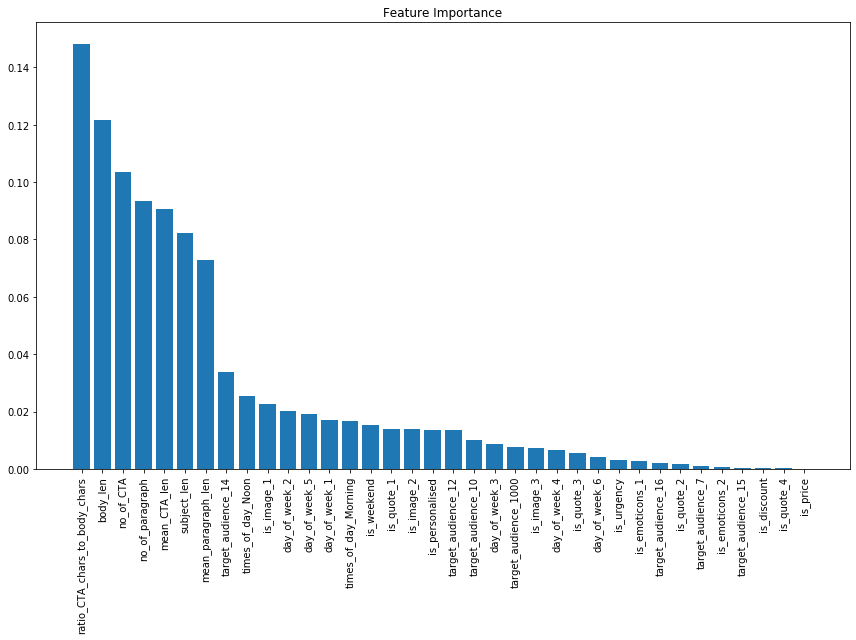

In [1250]:
plt.figure(figsize=(12,9))
plt.title('Feature Importance')
plt.bar(range(train_x.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(train_x.shape[1]), X.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

In [834]:
imp_cols = list(X.columns[sorted_indices])[:10]

In [835]:
imp_cols

['ratio_CTA_chars_to_body_chars',
 'body_len',
 'subject_len',
 'no_of_CTA',
 'no_of_paragraph',
 'mean_CTA_len',
 'mean_paragraph_len',
 'target_audience_14',
 'is_image_1',
 'times_of_day_Noon']

In [110]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(reg_alpha=10.0)

In [1252]:
xgb_reg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, objective='reg:squarederror',
             predictor=None, random_state=None, reg_alpha=10.0, ...)

In [1253]:
xgb_reg.fit(train_x,train_y,
               verbose= True,
               early_stopping_rounds=10,
               eval_metric='rmse',
               eval_set=[(test_x,test_y)])

/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/home/FRACTAL/bhupesh.hada/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[0]	validation_0-rmse:0.33439
[1]	validation_0-rmse:0.24320
[2]	validation_0-rmse:0.18028
[3]	validation_0-rmse:0.13795
[4]	validation_0-rmse:0.11017
[5]	validation_0-rmse:0.09249
[6]	validation_0-rmse:0.08112
[7]	validation_0-rmse:0.07429
[8]	validation_0-rmse:0.07036
[9]	validation_0-rmse:0.06802
[10]	validation_0-rmse:0.06673
[11]	validation_0-rmse:0.06567
[12]	validation_0-rmse:0.06502
[13]	validation_0-rmse:0.06458
[14]	validation_0-rmse:0.06433
[15]	validation_0-rmse:0.06416
[16]	validation_0-rmse:0.06402
[17]	validation_0-rmse:0.06390
[18]	validation_0-rmse:0.06384
[19]	validation_0-rmse:0.06381
[20]	validation_0-rmse:0.06376
[21]	validation_0-rmse:0.06374
[22]	validation_0-rmse:0.06373
[23]	validation_0-rmse:0.06371
[24]	validation_0-rmse:0.06371
[25]	validation_0-rmse:0.06371
[26]	validation_0-rmse:0.06371
[27]	validation_0-rmse:0.06371
[28]	validation_0-rmse:0.06371
[29]	validation_0-rmse:0.06371
[30]	validation_0-rmse:0.06371
[31]	validation_0-rmse:0.06371
[32]	validation_0-

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, objective='reg:squarederror',
             predictor='auto', random_state=0, reg_alpha=10.0, ...)

In [1254]:
rf_pred_train_y = xgb_reg.predict(train_x)

rf_r2 = r2_score(train_y, rf_pred_train_y)
print('r2 score for test data', rf_r2)

r2 score for test data 0.2649143962856928


In [1255]:
rf_pred_test_y = xgb_reg.predict(test_x)

rf_r2 = r2_score(test_y, rf_pred_test_y)
print('r2 score for test data', rf_r2)

r2 score for test data 0.23187701070319489


In [1256]:
# impleplmenting ridge_regression

In [109]:
from sklearn.linear_model import Ridge
mod = Ridge(alpha = 2.0)
mod.fit(train_x,train_y)

Ridge(alpha=2.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [1258]:
pred_train_y = mod.predict(train_x)

r2 = r2_score(train_y, pred_train_y)
print('r2 score for test data', r2)

r2 score for test data 0.20346731988770161


In [1259]:
pred_test_y = mod.predict(test_x)

r2 = r2_score(test_y, pred_test_y)
print('r2 score for test data', r2)

r2 score for test data 0.20841579286851997


In [111]:
# Implemting stacked modeling to improve model performance
from sklearn.ensemble import StackingRegressor

base_models = [('ridge', Ridge()),
    ('xgboost',xgb.XGBRegressor()),
    ('Random Forest',RandomForestRegressor(n_estimators = 250, max_features = 'sqrt', max_depth = 8, random_state = 18)),
    ('Linear Regression',LinearRegression()),]
     
stacked = StackingRegressor(
    estimators = base_models,
    final_estimator = LinearRegression(),
    cv = 5)

In [112]:
import timeit
for name, model in base_models:   
    model.fit(train_x, train_y)
    prediction = model.predict(test_x)    
    
    r2 = model.score(test_x, test_y)
    rmse = mean_squared_error(test_y, prediction, squared = False)
    
    print("-------{}-------".format(name))
    print("Coefficient of determination: {}".format(r2))
    print("Root Mean Squared Error: {}".format(rmse))
#    print("Computation Time: {}".format(end_time - start_time))
    print("----------------------------------\n")
    
    

stacked.fit(train_x, train_y)    
stacked_prediction = stacked.predict(test_x)


stacked_r2 = stacked.score(test_x, test_y)
stacked_rmse = mean_squared_error(test_y, stacked_prediction, squared = False)

print("-------Stacked Ensemble-------")
print("Coefficient of determination: {}".format(stacked_r2))
print("Root Mean Squared Error: {}".format(stacked_rmse))
#print("Computation Time: {}".format(end_time - start_time))
print("----------------------------------")

-------ridge-------
Coefficient of determination: 0.17929071954783793
Root Mean Squared Error: 0.07835908928588284
----------------------------------

-------xgboost-------
Coefficient of determination: 0.37679633047095656
Root Mean Squared Error: 0.06828254641363392
----------------------------------

-------Random Forest-------
Coefficient of determination: 0.4731067106148814
Root Mean Squared Error: 0.06278502063533196
----------------------------------

-------Linear Regression-------
Coefficient of determination: 0.1795815869933154
Root Mean Squared Error: 0.07834520243918315
----------------------------------

-------Stacked Ensemble-------
Coefficient of determination: 0.4819441691785573
Root Mean Squared Error: 0.06225625477036811
----------------------------------


### Prediction for the test dataset

In [1262]:
pred_test_y = reg.predict(df_test_mod)

# r2 = r2_score(test_y, pred_test_y)
# print('r2 score for test data', r2)

In [1264]:
pred_test_y = rf.predict(df_test_mod)

In [1266]:
pred_test_y = xgb_reg.predict(df_test_mod)

In [113]:
pred_test_y = stacked.predict(df_test_mod)

In [114]:
final_df = pd.DataFrame({'campaign_id':test_campaign_id,'click_rate':pred_test_y})


final_df.to_csv('results_stacked_1.csv',index=False)